In [1]:
from pathlib import Path
import pickle

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from coatiLDM.constants import FIGURE_DATA_PATH
from coatiLDM.common.s3 import load_figure_file

In [2]:
fig_path = './figure_data/transformer_compare_fig/'

# TPSA

In [4]:
curr_df = load_figure_file('tpsa_compare.csv', local_dir=fig_path,filetype='csv')

Text(0, 0.5, 'Generated TPSA')

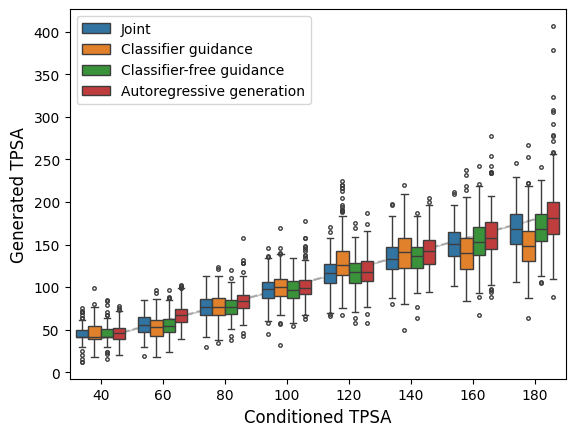

In [8]:
# sort by conditioned fsp3
curr_df = curr_df.sort_values("cond_target")

dummy_df = curr_df.copy()
dummy_df["x"] = dummy_df["cond_target"].astype(str)
dummy_df["y"] = dummy_df["cond_target"]
ax = sns.lineplot(
    y="y",
    x="x",
    data=dummy_df,
    legend=True,
    color="black",
    alpha=0.2,
)
ax.lines[0].set_linestyle("--")


ax = sns.boxplot(
    data=curr_df,
    x="cond_target",
    y=f"rdkit_tpsa",
    hue="method",
    flierprops=dict(marker=".", markersize=5),
)


# legend in upper left
plt.legend(loc="upper left")

# change x-axis label
plt.xlabel("Conditioned TPSA", fontsize=12)
plt.ylabel("Generated TPSA", fontsize=12)

In [10]:
# calculate MAE for each method
mae_df = curr_df.groupby(["method"]).apply(
    lambda x: np.mean(np.abs(x[f"rdkit_tpsa"] - x[f"cond_target"]))
)

# calculate rmsd for each method
rmsd_df = curr_df.groupby(["method"]).apply(
    lambda x: np.sqrt(np.mean((x[f"rdkit_tpsa"] - x[f"cond_target"]) ** 2))
)
print(f"property: tpsa")
print("MAE:")
print(mae_df)
print()
print("RMSD:")
print(rmsd_df)

property: tpsa
MAE:
method
Autoregressive generation    15.243044
Classifier guidance          19.107978
Classifier-free guidance     13.959397
Joint                        14.108860
dtype: float64

RMSD:
method
Autoregressive generation    22.277193
Classifier guidance          25.690265
Classifier-free guidance     18.718115
Joint                        18.618320
dtype: float64


/tmp/ipykernel_1428201/4067334765.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mae_df = curr_df.groupby(["method"]).apply(
/tmp/ipykernel_1428201/4067334765.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmsd_df = curr_df.groupby(["method"]).apply(


# fsp3

In [6]:
curr_df = load_figure_file('fsp3_compare.csv', local_dir=fig_path,filetype='csv')

Text(0, 0.5, 'Generated fsp3')

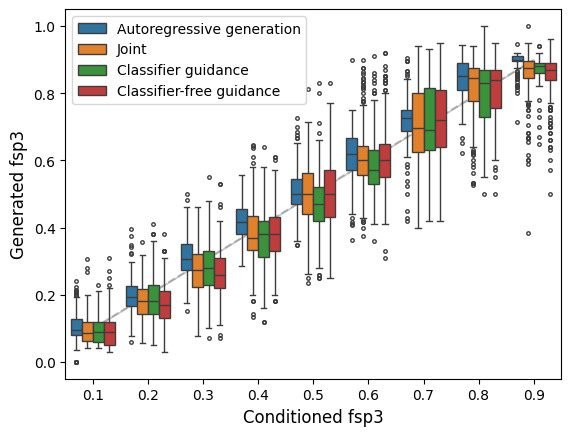

In [14]:
dummy_df = curr_df.copy()
dummy_df["x"] = dummy_df["cond_target"].astype(str)
dummy_df["y"] = dummy_df["cond_target"]
ax = sns.lineplot(
    y="y",
    x="x",
    data=dummy_df,
    legend=True,
    color="black",
    alpha=0.2,
)
ax.lines[0].set_linestyle("--")


ax = sns.boxplot(
    data=curr_df,
    x="cond_target",
    y=f"rdkit_fsp3",
    hue="method",
    flierprops=dict(marker=".", markersize=5),
)


# legend in upper left
plt.legend(loc="upper left")

# change x-axis label
plt.xlabel("Conditioned fsp3", fontsize=12)
plt.ylabel("Generated fsp3", fontsize=12)

In [15]:
# calculate MAE for each method
mae_df = curr_df.groupby(["method"]).apply(
    lambda x: np.mean(np.abs(x[f"rdkit_fsp3"] - x[f"cond_target"]))
)

# calculate rmsd for each method
rmsd_df = curr_df.groupby(["method"]).apply(
    lambda x: np.sqrt(np.mean((x[f"rdkit_fsp3"] - x[f"cond_target"]) ** 2))
)
print(f"property: fsp3")
print("MAE:")
print(mae_df)
print()
print("RMSD:")
print(rmsd_df)

property: fsp3
MAE:
method
Autoregressive generation    0.043862
Classifier guidance          0.061835
Classifier-free guidance     0.065150
Joint                        0.063019
dtype: float64

RMSD:
method
Autoregressive generation    0.059231
Classifier guidance          0.081481
Classifier-free guidance     0.086009
Joint                        0.083956
dtype: float64


/tmp/ipykernel_1428201/2693982929.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mae_df = curr_df.groupby(["method"]).apply(
/tmp/ipykernel_1428201/2693982929.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmsd_df = curr_df.groupby(["method"]).apply(
